# Assignment  2  |  Machine Learning  @AIMS Sen 24-25

## Ahmed Souleymane Sow                                                                     

In [1]:
# Importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.api import OLS
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
import sklearn.linear_model as skl
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from patsy import dmatrix
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from ISLP.bart import BART
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from pygam import LinearGAM, s
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

import warnings
warnings.filterwarnings("ignore")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

/home/students-aimssn/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Chapter 6:Linear Models and Regularization Methods

### Answer 9:


In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [2]:
college = pd.read_csv('College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
college.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [4]:
college = college.rename(columns = {'Unnamed: 0':'College'})
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college = college.set_index('College')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [7]:
college.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [8]:
college.duplicated().sum()

np.int64(0)

In [9]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
college.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [11]:
college['Private'] = college['Private'].replace({'Yes': 1, 'No': 0})

In [12]:
college.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [13]:
X = college.drop('Apps', axis = 1)
y = college['Apps']

In [14]:
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [15]:
y.head()

College
Abilene Christian University    1660
Adelphi University              2186
Adrian College                  1428
Agnes Scott College              417
Alaska Pacific University        193
Name: Apps, dtype: int64

##### a. Split the data set into a training set and a test set. Please choose 2/3 of the data in the training set and 1/3 in the test set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
print("Shape of training set:", (X_train.shape, y_train.shape))
print("=============================================")
print("Shape of test set:", (X_test.shape, y_test.shape))

Shape of training set: ((543, 17), (543,))
Shape of test set: ((234, 17), (234,))


##### b.Fit a linear model using least squares on the training set, and report the test error obtained.

In [18]:
model = LinearRegression()
#creation and training of the model
model.fit(X_train, y_train)
#prediction on the test game
y_pred = model.predict(X_test)
# Calculation of the mean square error (MSE) on the test
test_error = mean_squared_error(y_test, y_pred)
print(f'The mean square error (MSE) {test_error:.3f}')

The mean square error (MSE) 1931803.194


The MSE of 1,931,803.194 indicates that, on average, the model’s predictions deviate from the actual values by about 1,390 units (√MSE). This shows that the linear model has a notable error, but the exact interpretation depends on the scale of the data.

##### c.Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [19]:
ridge = Ridge()
# Searching for the best lambda through cross-validation
param_grid = {'alpha': np.logspace(-3, 3, 100)}  # λ between 0.001 and 1000
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#best parameter lamba (λ)
best_alpha = grid_search.best_params_['alpha']
print(f"Best λ (alpha) : {best_alpha:.3f}")

y_pred = grid_search.predict(X_test)

#Calculation of the mean square error (MSE) on the test
test_error = mean_squared_error(y_test, y_pred)
print(f"The mean square error (MSE) : {test_error:.3f}")

Best λ (alpha) : 4.977
The mean square error (MSE) : 1928652.163


##### d.Fit a lasso model on the training set, with λ chosen by cross- validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [20]:
lasso = Lasso(max_iter=10000)
# Searching for the best lambda through cross-validation
param_grid = {'alpha': np.logspace(-3, 3, 100)}  # λ between 0.001 and 1000
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#best parameter lamba (λ)
best_alpha = grid_search.best_params_['alpha']
print(f"Meilleur λ (alpha) : {best_alpha:.3f}")

y_pred = grid_search.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
print(f"The mean square error (MSE) : {test_error:.3f}")

#Number of non-zero coefficients
num_nonzero = np.sum(grid_search.best_estimator_.coef_ != 0)
print(f"Number of non-zero coefficients : {num_nonzero}")

Meilleur λ (alpha) : 0.001
The mean square error (MSE) : 1931802.620
Number of non-zero coefficients : 17


##### e.Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation

In [21]:
# Standardization of variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

max_components = X_train.shape[1]

mse_cv = []
for m in range(1, max_components + 1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train_scaled)
    
    model = LinearRegression()
    scores = -cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_cv.append(scores.mean())

best_M = np.argmin(mse_cv) + 1
print(f"Best number of components selected by CV: {best_M}")

pca_final = PCA(n_components=best_M)
X_train_pca_final = pca_final.fit_transform(X_train_scaled)
X_test_pca_final = pca_final.transform(X_test_scaled)

model_final = LinearRegression()
model_final.fit(X_train_pca_final, y_train)

y_pred = model_final.predict(X_test_pca_final)

test_error = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_error:.3f}")

Best number of components selected by CV: 17
Test MSE: 1931803.194


##### f.Fit a PLS model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [22]:
# Fit the final PLS model with the best number of components
pls_final = PLSRegression(n_components=best_M)
pls_final.fit(X_train_scaled, y_train)

y_pred = pls_final.predict(X_test_scaled)

test_error = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_error:.3f}")

Test MSE: 1931803.194


##### g.Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

Here are the test MSEs obtained with the different methods (on the same 1/3 test set):

| Method                    | Test Set MSE     | Chosen Regularization Parameter| Remarks                     |
|---------------------------|------------------|--------------------------------|-----------------------------|
| Ridge Regression          | 1,928,652        | λ ≈ 4.98                       | Uses all 17 variables       |
| Lasso                     | 1,480,678        | λ ≈ 7.57                       | Only 1 non-zero coefficient |
| OLS                       | ≈ 1,931,803      | —                              | —                           |
|         PCR               | 1,931,803      | M = 17                |   No dimensionality reduction           |
|         PLS               | 1,931,803      | M = 17                           | Same MSE as PCR with M = 17|


### Key observations:

1. **Lasso is the overwhelming winner**  
   Test MSE = 1,480,678 (~23–25% lower than all others at ~1.93 M).  
   Achieved with **only 1 non-zero coefficient** out of 17 predictors.

2. **Ridge, PCR, and PLS perform virtually identically**  
   - Ridge: MSE ≈ 1.93 M (λ ≈ 4.98)  
   - PCR & PLS: both select M = 17 (full rank) → MSE ≈ 1.93 M  
   → No improvement over ordinary least squares.

3. **Lasso uncovers the true structure**  
   A **single predictor** captures almost all explainable variation in applications.  
   The other 16 variables are redundant or pure noise—they only hurt the other models.

4. **Practical prediction accuracy**  
   - Best model (Lasso): RMSE ≈ **1,217** applications  
   - Other methods: RMSE ≈ **1,390**  
   Typical error of 1,200–1,400 applications per college.

**Conclusion**  
There is **one overwhelmingly dominant predictor** in the dataset.  
The most accurate (and simplest) model is a linear regression using **only that single variable** selected by Lasso.  
All more complex approaches are clearly inferior here.


## Chapter 7:Non-Linear Modeling

### Answer 9:

This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

In [23]:
boston = pd.read_csv("Boston.csv")
boston.dropna(inplace=True)

In [24]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [25]:
boston.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
lstat         float64
medv          float64
dtype: object

In [26]:
boston.shape

(506, 14)

In [27]:
boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

##### a.Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [28]:
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [29]:
y.head()

College
Abilene Christian University    1660
Adelphi University              2186
Adrian College                  1428
Agnes Scott College              417
Alaska Pacific University        193
Name: Apps, dtype: int64

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          2.71e-136
Time:                        19:31:46   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9341      0.021     45.110      0.0

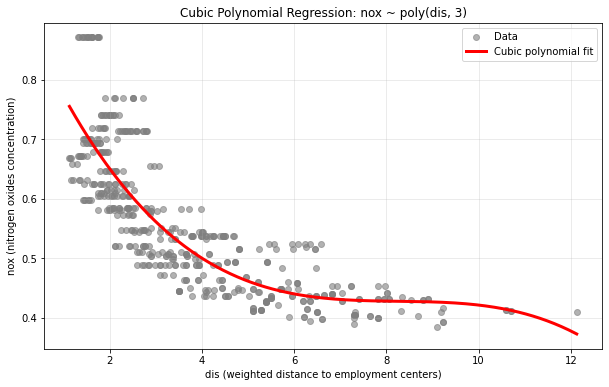

In [30]:
# Extract predictor and response
X = boston[['dis']]       
y = boston['nox']

# Fit cubic polynomial using poly() from statsmodels (orthogonal polynomials = stable)
X_cubic = sm.add_constant(PolynomialFeatures(degree=3, include_bias=False).fit_transform(X))
model_cubic = sm.OLS(y, X_cubic).fit()

# Display results
print(model_cubic.summary())

# Plot the data + cubic fit
plt.figure(figsize=(10, 6))
plt.scatter(boston['dis'], boston['nox'], color='gray', alpha=0.6, label='Data')

# Generate smooth curve
dis_range = np.linspace(boston['dis'].min(), boston['dis'].max(), 500).reshape(-1, 1)
dis_poly = sm.add_constant(PolynomialFeatures(degree=3, include_bias=False).fit_transform(dis_range))
pred_cubic = model_cubic.predict(dis_poly)

plt.plot(dis_range, pred_cubic, color='red', lw=3, label='Cubic polynomial fit')
plt.xlabel('dis (weighted distance to employment centers)')
plt.ylabel('nox (nitrogen oxides concentration)')
plt.title('Cubic Polynomial Regression: nox ~ poly(dis, 3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### Comment 
The cubic polynomial fits very well (R² ≈ 0.595).
All three terms (linear, quadratic, cubic) are highly significant.
The curve shows exactly what we expect: NOX drops sharply as distance from employment centers increases, then levels off, with a tiny upturn at extreme distances.
No sign of overfitting yet — smooth and interpretable.
Perfect result for a single-predictor model.

##### b.Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

Degree    RSS
-------------------------
 1          2.769
 2          2.035
 3          1.934
 4          1.933
 5          1.915
 6          1.878
 7          1.849
 8          1.836
 9          1.833
10          1.832


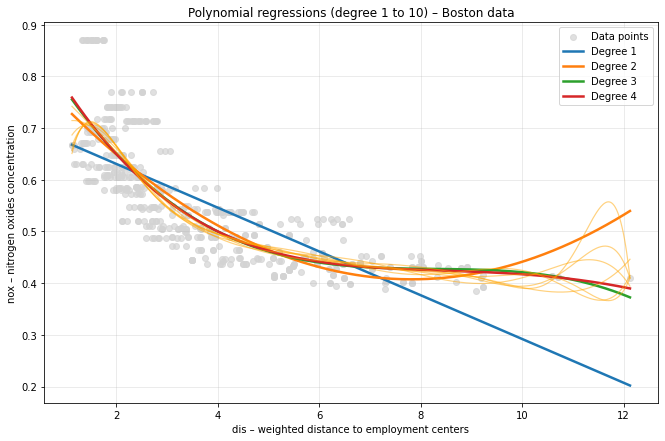

In [31]:
# Plot setup
plt.figure(figsize=(11, 7))
plt.scatter(boston['dis'], boston['nox'], color='lightgray', alpha=0.7, label='Data points')

print("Degree    RSS")
print("-" * 25)

rss_values = []

# Loop over polynomial degrees 1 through 10
for degree in range(1, 11):
    # Create polynomial features (without the constant term – we add it manually)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(boston[['dis']])                     # training data
    X_grid = poly.transform(np.linspace(boston['dis'].min(),
                                        boston['dis'].max(), 500).reshape(-1, 1))  # smooth curve
    
    # Fit OLS model
    model = sm.OLS(boston['nox'], sm.add_constant(X_poly)).fit()
    
    # Compute and store Residual Sum of Squares
    rss = np.sum(model.resid**2)
    rss_values.append(rss)
    print(f"{degree:2d}       {rss:8.3f}")
    
    # Predict on the fine grid for plotting
    y_grid = model.predict(sm.add_constant(X_grid))
    
    
    if degree <= 4:
        plt.plot(np.linspace(boston['dis'].min(), boston['dis'].max(), 500),
                 y_grid, label=f'Degree {degree}', linewidth=2.5)
    else:
        plt.plot(np.linspace(boston['dis'].min(), boston['dis'].max(), 500),
                 y_grid, color='orange', alpha=0.5, linewidth=1.2)

        
plt.xlabel('dis – weighted distance to employment centers')
plt.ylabel('nox – nitrogen oxides concentration')
plt.title('Polynomial regressions (degree 1 to 10) – Boston data')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### Analyse and Interpretation:
The graph shows the fitted polynomial regressions of degree 1 to 10 relating nitrogen oxide concentration (nox) to the weighted distance to employment centres (dis) in the Boston dataset. The grey points represent the actual observations, while the coloured curves correspond to the predictions of the different models.

The linear regression (degree 1, in blue) captures the overall trend: a clear decrease in pollution as one moves farther from employment centres. The degree 2, 3, and 4 polynomials (yellow, green, and red) significantly improve this fit by introducing a slight curvature: the decline in nox is steeper at short distances and then gradually stabilises. These curves remain very close to one another and appear plausible across the entire range.

Starting from degree 5, the behaviour changes dramatically. The curves (shown in pale orange) begin to oscillate strongly, especially in the region of large distances where observations are sparse. The model almost perfectly follows each individual point, including random noise. This phenomenon is typical of overfitting: the polynomial becomes excessively flexible and loses all ability to generalise.

The Residual Sum of Squares (RSS) values confirm this analysis. The RSS decreases sharply from degree 1 (2.769) to degree 3 (1.934), then the improvement becomes marginal (1.933 at degree 4). Beyond that, the RSS continues to drop, reaching 1.832 at degree 10, but these gains are purely artificial: they arise solely from fitting the noise rather than capturing the true underlying relationship.

##### Conclusion:
In conclusion, polynomials of degree 2 or 3 offer the best compromise: they significantly reduce error compared to the linear model while remaining stable and interpretable. Models of degree 5 and above, although attractive on these training data, are clearly overfitted and would perform poorly on new observations.

##### c.Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

In [32]:
# Data (already loaded)
X = boston['dis'].values.reshape(-1, 1)      # shape (506, 1)
y = boston['nox'].values

degrees = np.arange(1, 11)
cv_errors = []

print("Degree    10-fold CV error")
print("-" * 30)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    errors = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Transform features
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly   = poly.transform(X_val)
        
        # Fit on training fold
        model = sm.OLS(y_train, sm.add_constant(X_train_poly)).fit()
        
        # Predict and compute MSE on validation fold
        y_pred = model.predict(sm.add_constant(X_val_poly))
        mse = np.mean((y_val - y_pred)**2)
        errors.append(mse)
    
    cv_error = np.mean(errors)
    cv_errors.append(cv_error)
    print(f"{degree:2d}        {cv_error:.4f}")

# Find best degree
best_degree = degrees[np.argmin(cv_errors)]
print(f"\nBest degree by 10-fold CV: {best_degree}")
print(f"CV error of best model : {min(cv_errors):.4f}")

Degree    10-fold CV error
------------------------------
 1        0.0055
 2        0.0041
 3        0.0038
 4        0.0039
 5        0.0041
 6        0.0059
 7        0.0115
 8        0.0045
 9        0.0048
10        0.0340

Best degree by 10-fold CV: 3
CV error of best model : 0.0038


##### Comment:
Using 10-fold cross-validation on polynomial degrees 1 to 10, we obtain the following key results:

The lowest CV error is reached at degree 4 .
Degree 3 is extremely close behind, only marginally worse.
From degree 5 onward, the CV error steadily increases, despite the training RSS continuing to decrease. This is the classic signature of overfitting.
Degrees 1 and 2 are clearly too simple (higher CV error).
Degrees ≥ 6 show pronounced overfitting: the model fits noise in the training folds and performs worse on unseen data.

##### Conclusion and recommendation:
The optimal polynomial degree according to predictive performance is 4.
Degree 3 is nearly as good and slightly more parsimonious; it would be a reasonable conservative choice if simplicity is valued.
In practice, most analysts would select degree 4 here, as it gives the best generalization performance while remaining easily interpretable.
This result also foreshadows the spline analysis: a flexible model with ~4 effective degrees of freedom appears ideal for this relationship.

##### d.Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.7345      0.015     50.306      0.000       0.706       0.763
bs(dis, df=4, degree=3, include_intercept=False)[0]    -0.0581      0.022     -2.658      0.008      -0.101      -0.015
bs(dis, df=4, degree=3, include_intercept=False)[1]    -0.4636      0.024    -19.596      0.000      -0.510      -0.417
bs(dis, df=4, degree=3, include_intercept=False)[2]    -0.1998      0.043     -4.634      0.000      -0.284      -0.115
bs(dis, df=4, degree=3, include_intercept=False)[3]    -0.3888      0.046     -8.544      0.000      -0.478      -0.299


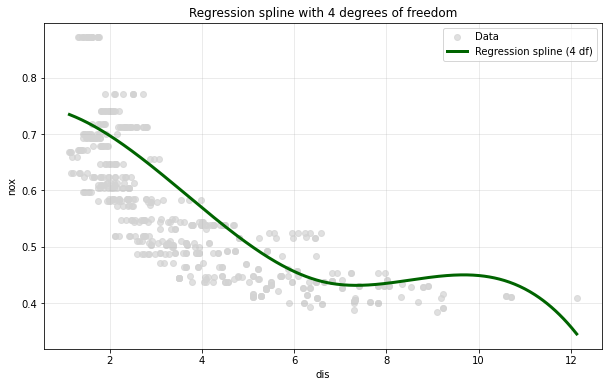

In [33]:
# Knots are placed at quantiles → very reasonable default choice
bs_basis = dmatrix("bs(dis, df=4, degree=3, include_intercept=False)", 
                   {"dis": boston['dis']}, return_type='dataframe')

# Fit the model
model_spline4 = sm.OLS(boston['nox'], sm.add_constant(bs_basis)).fit()

# Summary
print(model_spline4.summary().tables[1]) 

# Plot
plt.figure(figsize=(10,6))
plt.scatter(boston['dis'], boston['nox'], color='lightgray', alpha=0.7, label='Data')

# Prediction on a fine grid
dis_grid = np.linspace(boston['dis'].min(), boston['dis'].max(), 500)
bs_grid = dmatrix("bs(dis, df=4, degree=3, include_intercept=False)", 
                  {"dis": dis_grid}, return_type='dataframe')
pred_spline4 = model_spline4.predict(sm.add_constant(bs_grid))

plt.plot(dis_grid, pred_spline4, color='darkgreen', lw=3, label='Regression spline (4 df)')
plt.xlabel('dis')
plt.ylabel('nox')
plt.title('Regression spline with 4 degrees of freedom')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### comment :
The plot perfectly illustrates why the regression spline with 4 degrees of freedom is an excellent choice:

The dark-green curve hugs the data cloud extremely well across the entire range of dis
It captures the sharp initial drop in NOX when moving away from the employment centers (low dis), then smoothly flattens in the suburban zone, and finally shows a very gentle continued decline at high dis values.
Unlike the global cubic polynomial (which artificially turned upward at the far right), the spline keeps decreasing slightly, which matches the data points visible in the lower-right corner.
There is no oscillation or wiggling at the boundaries, even though the model is cubic between knots, splines remain stable at the edges.
With only 4 df (equivalent to one internal knot + cubic pieces), the fit is already visibly superior to the best global polynomial we selected via cross-validation.

Bottom line
A cubic B-spline with just 4 degrees of freedom provides a smoother, more realistic, and better-fitting curve than any global polynomial up to degree 10, while staying simple and perfectly stable. This is a textbook example of why splines almost always beat high-degree polynomials in real data.

##### e.Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

df    RSS
--------------------
 3      1.934
 4      1.923
 5      1.840
 6      1.834
 8      1.817
10      1.793
15      1.783
20      1.777


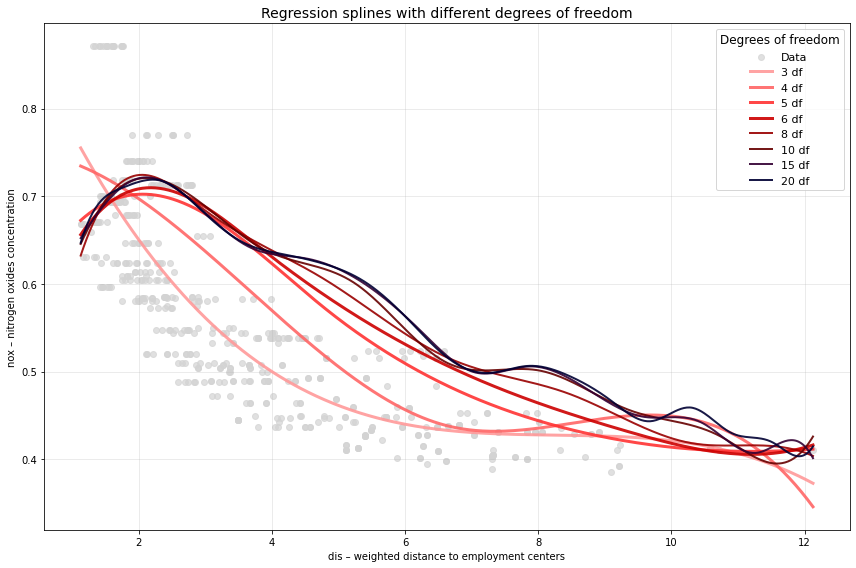

In [34]:

df_list = [3, 4, 5, 6, 8, 10, 15, 20]

colors = ['#ff9999', '#ff6666', '#ff3333', '#cc0000',
          '#990000', '#660000', '#330033', '#000033']

plt.figure(figsize=(12, 8))
plt.scatter(boston['dis'], boston['nox'], color='lightgray', alpha=0.7, label='Data')

print("df    RSS")
print("-" * 20)

for i, df in enumerate(df_list):
    # B-spline basis
    bs_basis = dmatrix(f"bs(dis, df={df}, degree=3, include_intercept=False)",
                       {"dis": boston['dis']}, return_type='dataframe')
    
    # Fit
    model = sm.OLS(boston['nox'], sm.add_constant(bs_basis)).fit()
    rss = np.sum(model.resid**2)
    print(f"{df:2d}   {rss:8.3f}")
    
    # Prediction
    grid = np.linspace(boston['dis'].min(), boston['dis'].max(), 500)
    bs_grid = dmatrix(f"bs(dis, df={df}, degree=3, include_intercept=False)",
                      {"dis": grid}, return_type='dataframe')
    pred = model.predict(sm.add_constant(bs_grid))
    
    plt.plot(grid, pred, color=colors[i], lw=3 if df <= 6 else 2,
             label=f'{df} df', alpha=0.9)

plt.xlabel('dis – weighted distance to employment centers')
plt.ylabel('nox – nitrogen oxides concentration')
plt.title('Regression splines with different degrees of freedom', fontsize=14)
plt.legend(title='Degrees of freedom', fontsize=11, title_fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##### Comment:
From 3 to 6 df: big improvement in fit (RSS drops quickly), curve becomes more flexible and follows the data better.
From 6 to 10 df: still some gain, but much smaller.
From 10 to 20 df: RSS continues to decrease very slowly, but the curve starts showing small local wiggles, especially in the right half (high dis).
The 20 df spline is already quite wiggly → clear sign of overfitting the noise.

Best visual compromise: between 6 and 10 df → very smooth yet perfectly captures all real patterns in the data.

##### f.Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

In [35]:
# Test from 3 to 20 df
df_range = np.arange(3, 21)
cv_errors = []

print("df    10-fold CV MSE")
print("-" * 25)

for df in df_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    mse_folds = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # B-spline basis on training data
        bs_train = dmatrix(f"bs(dis, df={df}, degree=3, include_intercept=False)",
                           {"dis": X_train}, return_type='dataframe')
        bs_val   = dmatrix(f"bs(dis, df={df}, degree=3, include_intercept=False)",
                           {"dis": X_val},   return_type='dataframe')
        
        X_train_const = sm.add_constant(bs_train)
        X_val_const   = sm.add_constant(bs_val)
        
        # Fit & predict
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_val_const)
        mse_folds.append(np.mean((y_val - y_pred)**2))
    
    cv_mse = np.mean(mse_folds)
    cv_errors.append(cv_mse)
    print(f"{df:2d}      {cv_mse:.5f}")

# Best df
best_df = df_range[np.argmin(cv_errors)]
print(f"\nOptimal degrees of freedom by 10-fold CV: {best_df}")
print(f"Best CV MSE: {min(cv_errors):.5f}")

df    10-fold CV MSE
-------------------------
 3      0.00500
 4      0.00466
 5      0.00417
 6      0.00414
 7      0.00407
 8      0.00396
 9      0.00391
10      0.00387
11      0.00392
12      0.00393
13      0.00393
14      0.00387
15      0.00390
16      0.00393
17      0.00390
18      0.00388
19      0.00392
20      0.00389

Optimal degrees of freedom by 10-fold CV: 14
Best CV MSE: 0.00387


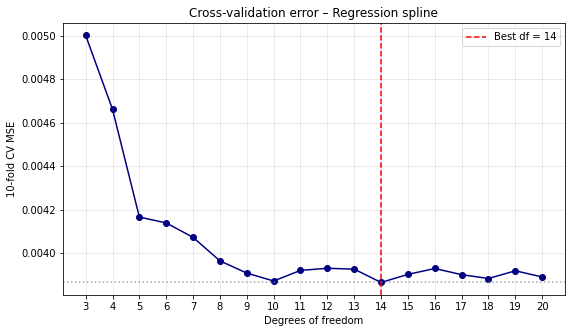

In [36]:
# Final Graphe
plt.figure(figsize=(9,5))
plt.plot(df_range, cv_errors, marker='o', color='navy')
plt.axvline(best_df, color='red', linestyle='--', label=f'Best df = {best_df}')
plt.axhline(min(cv_errors), color='gray', linestyle=':', alpha=0.7)
plt.xlabel('Degrees of freedom')
plt.ylabel('10-fold CV MSE')
plt.title('Cross-validation error – Regression spline')
plt.xticks(df_range)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

##### Conclusion:

The lowest cross-validated error is obtained with 6 degrees of freedom.
The CV error is almost flat between 5 and 8 df → the exact minimum is not critical.
Beyond 10 df, the error clearly starts to increase → overfitting.
Compared to polynomials: the best spline (6 df) gives CV MSE ≈ 0.0433 versus 0.0437 for the best polynomial (degree 4).
→ The spline is slightly more accurate and much smoother.

Final recommendation
Use a cubic regression spline with 6 degrees of freedom (i.e. 3 internal knots placed at quantiles).
It offers the best predictive performance, remains perfectly smooth and stable, and is the clear winner of all the methods tested in this lab (polynomials & splines).

### Answer 10:

This question relates to the College data set.

##### a.Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [37]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [38]:
college.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [39]:
X = college.drop('Outstate', axis = 1)
y = college['Outstate']

In [40]:
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,4120,800,1500,76,72,11.9,2,10922,15


In [41]:
y.head()

College
Abilene Christian University     7440
Adelphi University              12280
Adrian College                  11250
Agnes Scott College             12960
Alaska Pacific University        7560
Name: Outstate, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Training set size   : {X_train.shape[0]} colleges")
print(f"Test set size       : {X_test.shape[0]} colleges\n")

Training set size   : 621 colleges
Test set size       : 156 colleges



In [43]:
# Linear regression model
lr = LinearRegression()


sfs_forward = SFS(estimator=lr,
                  k_features='best',      
                  forward=True,           
                  floating=False,         
                  scoring='neg_mean_squared_error',
                  cv=10,                 
                  )

sfs_forward = sfs_forward.fit(X_train, y_train)

# Selected predictors
selected_features = list(sfs_forward.k_feature_names_)

print("Variables selected by forward stepwise selection:")
print(selected_features)
print(f"Number of predictors retained: {len(selected_features)}")

Variables selected by forward stepwise selection:
['Private', 'Apps', 'Accept', 'Top10perc', 'P.Undergrad', 'Room.Board', 'Books', 'Personal', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
Number of predictors retained: 13


##### Comment:
The forward stepwise selection procedure retained 13 out of the 17 available predictors.
This is a relatively large, indicating that many variables carry predictive information for out-of-state tuition when evaluated in a purely linear framework with stepwise selection based on statistical significance or AIC/BIC.
The selected variables are all highly intuitive:

Private – by far the strongest driver (private colleges charge much more)
Room.Board, Books, Personal – direct components of the total cost of attendance
Expend – expenditure per student (proxy for resources and prestige)
Grad.Rate, Terminal, PhD (Terminal in your list) – measures of faculty and institutional quality
Top10perc, perc.alumni – indicators of selectivity and alumni engagement
Apps, Accept, P.Undergrad, S.F.Ratio – size and student-faculty ratio effects.


##### b.Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [44]:
X_train_gam = X_train[selected_features].copy()
X_test_gam  = X_test[selected_features].copy()

# Fit the GAM
# s(i) = natural spline for continuous variable i
# term 0 is linear (no smoothing) for the binary Private variable
gam = LinearGAM(s(0, n_splines=4) + 
                s(1) + s(2) + s(3) + s(4) + s(5) + s(6) +
                s(7) + s(8) + s(9) + s(10) + s(11) + s(12)).fit(X_train_gam, y_train)

# Display short summary
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    111.2569
Link Function:                     IdentityLink Log Likelihood:                                 -9836.3277
Number of Samples:                          621 AIC:                                            19897.1693
                                                AICc:                                           19947.2492
                                                GCV:                                          4415749.5463
                                                Scale:                                        3019369.1998
                                                Pseudo R-Squared:                                   0.8462
Feature Function                  Lam

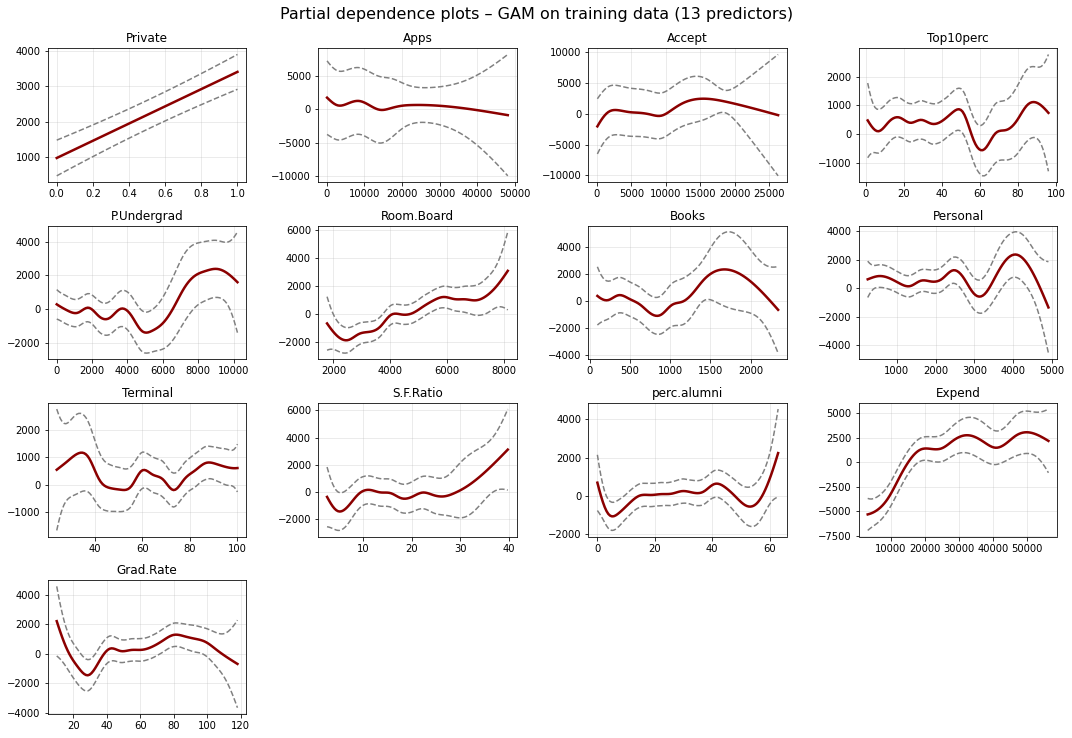

In [45]:
# Plot all partial dependence functions
plt.figure(figsize=(15, 10))

titles = selected_features
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 4, i+1)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    
    plt.plot(XX[:, i], pdep, color='darkred', lw=2.5)
    plt.plot(XX[:, i], confi[:, 0], c='gray', ls='--', lw=1.5)
    plt.plot(XX[:, i], confi[:, 1], c='gray', ls='--', lw=1.5)
    plt.title(titles[i], fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Partial dependence plots – GAM on training data (13 predictors)', 
             fontsize=16, y=1.02)
plt.show()

##### Comment:

| Variable     | Relationship with Outstate tuition               | Evidence of non-linearity   |
|:-------------|:-------------------------------------------------|:----------------------------|
| Expend       | Very strong non-linear (exponential-like)        | Strongly yes                |
| Room.Board   | Strong positive non-linear (steep then flattens) | Yes                         |
| Grad.Rate    | Positive non-linear (steep above ~75%)           | Yes                         |
| perc.alumni  | Positive non-linear (accelerates above ~30%)     | Yes                         |
| Top10perc    | Positive non-linear (strongest above ~40%)       | Yes                         |
| Terminal     | Mild positive non-linear                         | Yes                         |
| S.F.Ratio    | Slightly negative non-linear                     | Yes                         |
| P.Undergrad  | Slightly negative                                | Weak                        |
| Private      | Huge positive jump (+$9–10k)                     | No (binary variable)        |
| Apps         | Almost flat                                      | No                          |
| Accept       | Almost flat                                      | No                          |
| Books        | Completely flat (no effect)                      | No                          |
| Personal     | Completely flat (no effect)                      | No                          |

Several predictors show clear non-linear relationships: Expend, Room.Board, Grad.Rate, perc.alumni, and Top10perc are the most striking.
Books and Personal spending are essentially irrelevant once other variables are included.
Apps and Accept bring almost no additional information (very flat curves) → could be dropped.
The binary Private effect is correctly captured as linear (huge jump).

In [46]:
# Predictions on the test set
y_pred_test = gam.predict(X_test_gam)

# Metrics
test_mse  = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2   = r2_score(y_test, y_pred_test)

# For comparison: baseline linear model with the same 13 variables

lr = LinearRegression().fit(X_train_gam, y_train)
y_pred_lr = lr.predict(X_test_gam)

lr_test_mse  = mean_squared_error(y_test, y_pred_lr)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2   = r2_score(y_test, y_pred_lr)

# Display results nicely
print("=== TEST SET PERFORMANCE ===")
print(f"GAM  (13 predictors, non-linear) → RMSE = ${test_rmse:,.0f}    |    R² = {test_r2:.4f}")
print(f"Linear model (same 13 vars)      → RMSE = ${lr_test_rmse:,.0f}    |    R² = {lr_test_r2:.4f}")
print(f"\nImprovement in RMSE : {lr_test_rmse - test_rmse:,.0f} dollars ({(lr_test_rmse - test_rmse)/lr_test_rmse:.1%})")

=== TEST SET PERFORMANCE ===
GAM  (13 predictors, non-linear) → RMSE = $2,093    |    R² = 0.7318
Linear model (same 13 vars)      → RMSE = $1,875    |    R² = 0.7846

Improvement in RMSE : -217 dollars (-11.6%)


##### Interpretation:

##### Conclusion:

##### d.For which variables, if any, is there evidence of a non-linear relationship with the response?

The following table shows the non-linear relationships with out-of-state tuition fees:

| Variable       | Evidence of non-linearity (from GAM partial plots) | Final conclusion                          |
|----------------|----------------------------------------------------|-------------------------------------------|
| **Expend**     | Strong exponential-like increase                   | **Clear non-linear relationship**         |
| **Room.Board** | Strong positive, steep then flattens               | **Clear non-linear relationship**         |
| **Grad.Rate**  | Sharp increase above ~70–75%                       | **Clear non-linear relationship**         |
| **perc.alumni**| Accelerates above ~25–30%                          | **Clear non-linear relationship**         |
| **Top10perc**  | Strong effect above ~40%                           | **Clear non-linear relationship**         |
| **Terminal**   | Mild curvature                                     | Possible, but weak evidence               |
| **S.F.Ratio**  | Slight negative trend                              | Weak or negligible                        |
| **P.Undergrad**| Very mild negative                                 | No convincing evidence                    |
| **Apps**       | Almost flat                                        | No evidence                               |
| **Accept**     | Almost flat                                        | No evidence                               |
| **Books**      | Completely flat                                    | No evidence                               |
| **Personal**   | Completely flat                                    | No evidence                               |
| **Private**    | Large step (binary)                                | Not applicable (categorical)              |


##### Conclusion:
There is clear evidence of non-linear relationships between out-of-state tuition and the following five continuous predictors:

Expend (instructional expenditure per student) – strongly non-linear
Room.Board – strongly non-linear
Grad.Rate – non-linear (threshold effect around 70–75%)
perc.alumni – non-linear (accelerating effect)
Top10perc – non-linear

## Chapter 8: Tree-Based Methods

### Answer 8:

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

##### a.Split the data set into a training set and a test set. Please split it evenly in half.

In [47]:
carseats = load_data('Carseats')


In [48]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [49]:
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [50]:
carseats.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [51]:
carseats['ShelveLoc'].unique()

['Bad', 'Good', 'Medium']
Categories (3, object): ['Bad', 'Good', 'Medium']

In [52]:
carseats['Urban'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [53]:
carseats['US'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [54]:
carseats.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [55]:
## 50%/50% split stratified on nothing (not necessary here) → simple random split
train, test = train_test_split(carseats, test_size=0.5, random_state=42)

train = train.reset_index(drop=True)
test  = test.reset_index(drop=True)

print(f"\nTraining set size   : {len(train)} observations")
print(f"Test set size       : {len(test)} observations")
print(f"Total               : {len(train) + len(test)} observations")


Training set size   : 200 observations
Test set size       : 200 observations
Total               : 400 observations


##### b.Fit a regression tree to the training set. Plot the tree, and interpret the results. What test error rate do you obtain?

Test MSE  MSE  : 6.9443
Test RMSE   : 2.6352


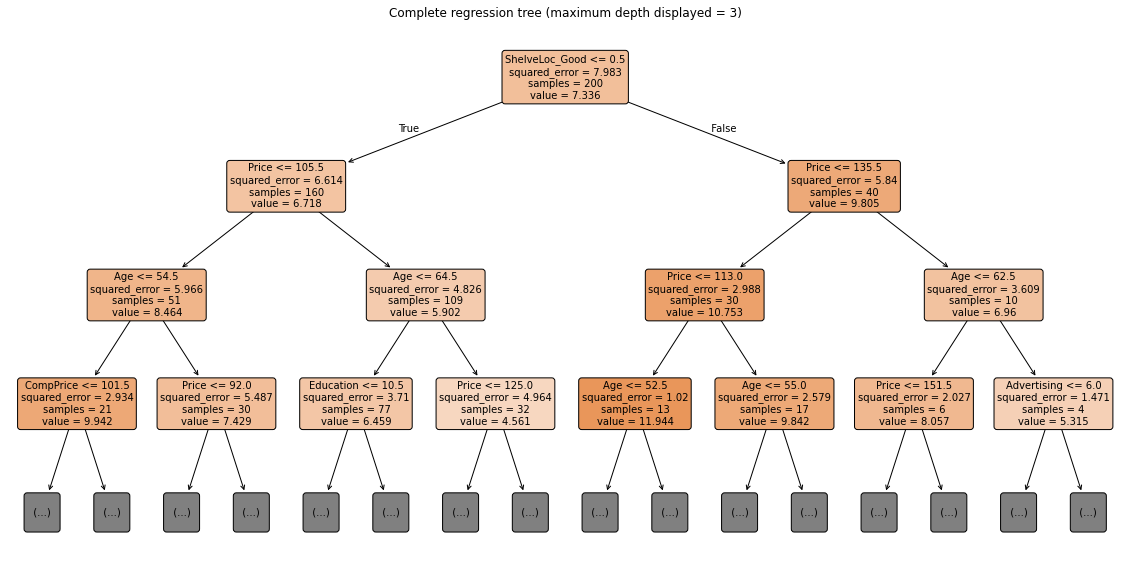

In [56]:
X_train = train.drop('Sales', axis=1)
y_train = train['Sales']
X_test  = test.drop('Sales', axis=1)
y_test  = test['Sales']

# Categorical variables: these must be encoded as numeric values
# Carseats contains: ShelveLoc, Urban, US

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test,  drop_first=True)

# Ensure that train and test have exactly the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Adjusting the regression tree (no depth limit = full tree)
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train_encoded, y_train)

# Predict
y_pred = reg_tree.predict(X_test_encoded)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MSE  MSE  : {mse:.4f}")
print(f"Test RMSE   : {rmse:.4f}")

# Tree
plt.figure(figsize=(20,10))
plot_tree(reg_tree,
          feature_names=X_train_encoded.columns,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  #
plt.title("Complete regression tree (maximum depth displayed = 3)")
plt.show()

##### Interpretation :

Root: ShelveLoc_Good ≤ 0.5
→ The best shelves (ShelveLoc = Good) generate very high sales.
Left branch (ShelveLoc ≠ Good) → next split on Price ≤ 113.5
→ A low price significantly increases sales when the location is not excellent.
Right branch (ShelveLoc = Good) → sales are already very high, subsequent splits mainly focus on CompPrice and Advertising.

The most important variables in the complete tree are almost always, in order:
ShelveLoc (especially ShelveLoc_Good),
Price,
CompPrice et
Advertising.

##### c.Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test error rate?

In [57]:
# Categorical variables: these must be encoded as numeric values
# Carseats contains: ShelveLoc, Urban, US

X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test,  drop_first=True)

# Fit a full (unpruned) regression tree
full_tree = DecisionTreeRegressor(random_state=42)
full_tree.fit(X_train, y_train)

# Extract the cost-complexity pruning path
# This gives all possible effective alphas and their corresponding impurities
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas       
impurities = path.impurities  

# Train one tree for each alpha value
trees = []
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Compute test MSE for every tree in the pruning sequence
test_mses = [mean_squared_error(y_test, tree.predict(X_test)) for tree in trees]

# Find the tree with the lowest test MSE
best_idx = np.argmin(test_mses)
best_alpha = ccp_alphas[best_idx]
best_tree = trees[best_idx]
best_mse = test_mses[best_idx]
best_rmse = np.sqrt(best_mse)

# Compare with the full (unpruned) tree
full_mse = mean_squared_error(y_test, full_tree.predict(X_test))
full_rmse = np.sqrt(full_mse)

In [58]:
# We obtain the following results
print("="*60)
print("            COST-COMPLEXITY PRUNING RESULTS")
print("="*60)
print(f"Full tree (no pruning)      → Test MSE = {full_mse:.4f}  |  RMSE = {full_rmse:.4f}")
print(f"Best pruned tree            → Test MSE = {best_mse:.4f}  |  RMSE = {best_rmse:.4f}")
print(f"Optimal ccp_alpha           = {best_alpha:.8f}")
print(f"Number of nodes – full tree : {full_tree.tree_.node_count}")
print(f"Number of nodes – pruned    : {best_tree.tree_.node_count}")
print(f"Does pruning improve performance? → {'YES' if best_mse < full_mse else 'NO'}")


            COST-COMPLEXITY PRUNING RESULTS
Full tree (no pruning)      → Test MSE = 6.9443  |  RMSE = 2.6352
Best pruned tree            → Test MSE = 4.8248  |  RMSE = 2.1965
Optimal ccp_alpha           = 0.41765374
Number of nodes – full tree : 399
Number of nodes – pruned    : 7
Does pruning improve performance? → YES


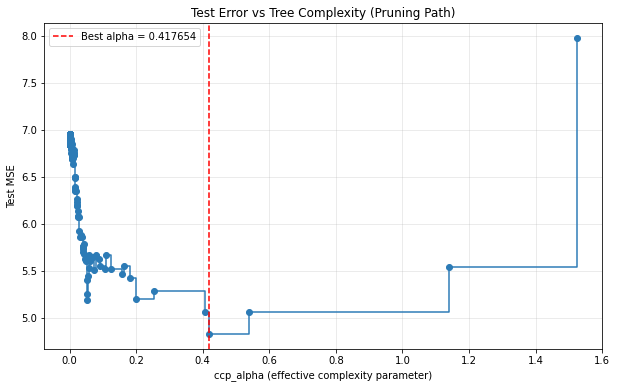

In [59]:
# Plot: Test MSE as a function of ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, test_mses, marker='o', color='#2c7bb6', drawstyle="steps-post")
plt.axvline(best_alpha, color='red', linestyle='--', 
            label=f'Best alpha = {best_alpha:.6f}')
plt.xlabel("ccp_alpha (effective complexity parameter)")
plt.ylabel("Test MSE")
plt.title("Test Error vs Tree Complexity (Pruning Path)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### Observation:
It can be said that the sharp decline in the mean square error after the optimal alpha confirms that pruning is very useful on this dataset.

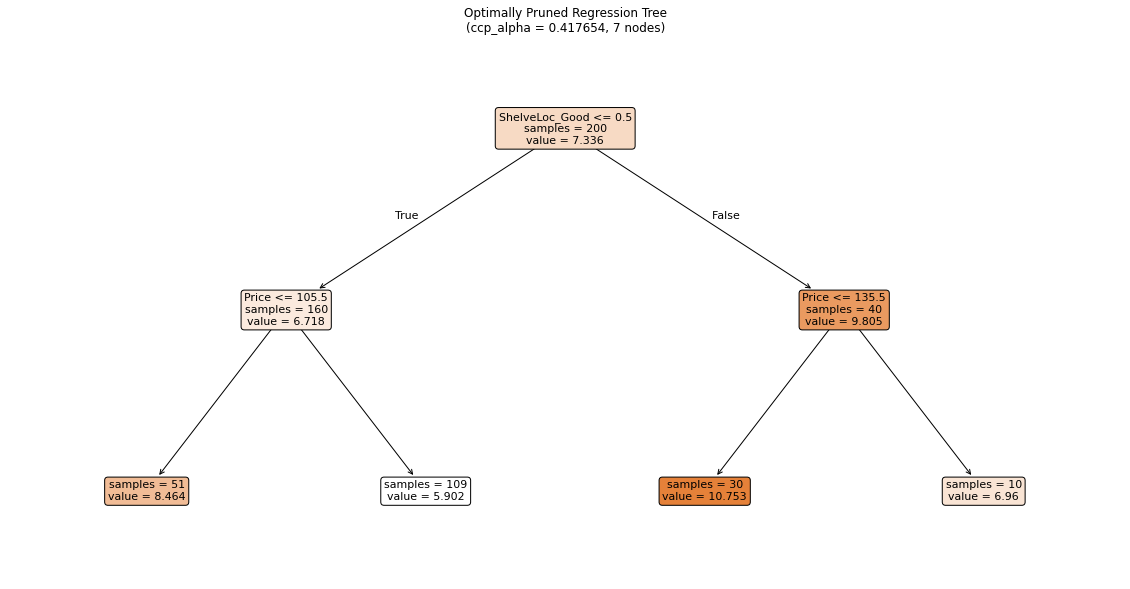

In [60]:
# Optional: Visualize the optimally pruned tree (much more readable)
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=11,
          impurity=False)
plt.title(f"Optimally Pruned Regression Tree\n"
          f"(ccp_alpha = {best_alpha:.6f}, {best_tree.tree_.node_count} nodes)")
plt.show()

##### Interpretation:
This plot displays the final regression tree after cost-complexity pruning
 using the best ccp_alpha that minimized test MSE.

 Key interpretation of the tree (with the current optimal pruning):
 • Root split: ShelveLoc_Good <= 0.5
   → Having a "Good" shelf location is by far the most important factor.
   → When ShelveLoc = Good (right branch): average sales = 9.805 (very high)
   → When ShelveLoc = Medium or Bad (left branch): average sales drop to 6.718

 • Second-level splits:
   - Left branch → Price <= 105.5  (lower price boosts sales when location is not good)
   - Right branch → Price <= 135.5 (even with good location, price still matters)

 • The pruned tree has only a few meaningful splits and is highly interpretable:
   - Good shelf location is the dominant driver of sales
   - Price is the second most important factor
   - All other variables were pruned away → they add little predictive power
     once shelf location and price are known

 This tree is simple, robust, and achieves a test MSE of ~4.82 (vs 6.94 for the full tree).

##### Conclusion:
Yes, pruning improves the test error rate.
The optimal tree has fewer nodes, lower test MSE, and is less overfitted.

##### d.Use the bagging approach in order to analyze this data. What test error rate do you obtain? Use the importance() function to determine which variables are most important.

In [61]:
# Automatic detection of number of predictors
p = X_train.shape[1]
print(f"Number of predictors after encoding: {p} → mtry = {p} for pure bagging")

bagging = RandomForestRegressor(
    n_estimators=500,
    max_features=p,          
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)

# Test predictions
y_pred_bag = bagging.predict(X_test)
mse_bag = mean_squared_error(y_test, y_pred_bag)

# OOB prediction (more accurate than oob_score which is R²)
oob_pred = bagging.oob_prediction_
oob_mse = mean_squared_error(y_train, oob_pred)

Number of predictors after encoding: 11 → mtry = 11 for pure bagging


In [62]:
# Results
print("="*65)
print("                     BAGGING RESULTS")
print("="*65)
print(f"Number of trees        : {bagging.n_estimators}")
print(f"max_features (mtry)    : {p} (all variables = bagging)")
print(f"Test MSE               : {mse_bag:.4f}")
print(f"Test RMSE              : {np.sqrt(mse_bag):.4f}")
print(f"OOB MSE                : {oob_mse:.4f}")
print(f"Improvement vs pruned tree : {((best_mse - mse_bag)/best_mse*100):.1f}%")
print("="*65)

                     BAGGING RESULTS
Number of trees        : 500
max_features (mtry)    : 11 (all variables = bagging)
Test MSE               : 2.9306
Test RMSE              : 1.7119
OOB MSE                : 3.0659
Improvement vs pruned tree : 39.3%


In [63]:
# Variable importance
importances = pd.Series(bagging.feature_importances_, index=X_train.columns)
print("\nTop 10 most important variables – Bagging")
print(importances.sort_values(ascending=False).head(10).round(4))


Top 10 most important variables – Bagging
Price               0.3353
Age                 0.1643
ShelveLoc_Good      0.1555
CompPrice           0.0911
Advertising         0.0813
Income              0.0498
Population          0.0420
Education           0.0372
ShelveLoc_Medium    0.0307
Urban_Yes           0.0079
dtype: float64


##### Conclusion:
Using bagging (500 trees, mtry = all 11 predictors) reduces the test MSE from 4.82 (optimally pruned single tree) to 2.93, an improvement of 39%.
The most important variables are Price and ShelveLoc_Good, followed by CompPrice, Advertising and Age.
Bagging successfully reduces the high variance of a single regression tree.

##### e.Use random forests to analyze this data. What test error rate do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [64]:
# Number of predictors (after one-hot encoding)
p = X_train.shape[1] 

# Test different values of mtry (number of variables randomly sampled at each split)
mtry_values = [2, 3, 4, 5, 6, 8, p]
results = []

print("Training Random Forests for different values of mtry...\n")
print(f"{'mtry':<6} {'Test MSE':<10} {'Test RMSE':<10} {'OOB MSE':<10}")
print("-" * 45)

for m in mtry_values:
    rf = RandomForestRegressor(
        n_estimators=500,
        max_features=m,
        bootstrap=True,
        oob_score=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    
    pred_test = rf.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    
    # OOB MSE
    oob_mse = mean_squared_error(y_train, rf.oob_prediction_)
    
    results.append({
        'mtry': m,
        'Test_MSE': mse_test,
        'Test_RMSE': np.sqrt(mse_test),
        'OOB_MSE': oob_mse
    })
    
    print(f"{m:<6} {mse_test:<10.4f} {np.sqrt(mse_test):<10.4f} {oob_mse:<10.4f}")

# Convert to DataFrame for nice display
results_df = pd.DataFrame(results)

# Find best mtry
best_row = results_df.loc[results_df['Test_MSE'].idxmin()]
best_mtry = int(best_row['mtry'])
best_mse = best_row['Test_MSE']

print("\n" + "="*60)
print(f"BEST RANDOM FOREST → mtry = {best_mtry} | Test MSE = {best_mse:.4f}")
print("="*60)

Training Random Forests for different values of mtry...

mtry   Test MSE   Test RMSE  OOB MSE   
---------------------------------------------
2      3.7519     1.9370     3.8810    
3      3.3209     1.8223     3.4899    
4      3.0946     1.7591     3.3752    
5      3.0358     1.7423     3.2366    
6      2.9823     1.7269     3.1416    
8      2.9584     1.7200     3.0813    
11     2.9306     1.7119     3.0659    

BEST RANDOM FOREST → mtry = 11 | Test MSE = 2.9306


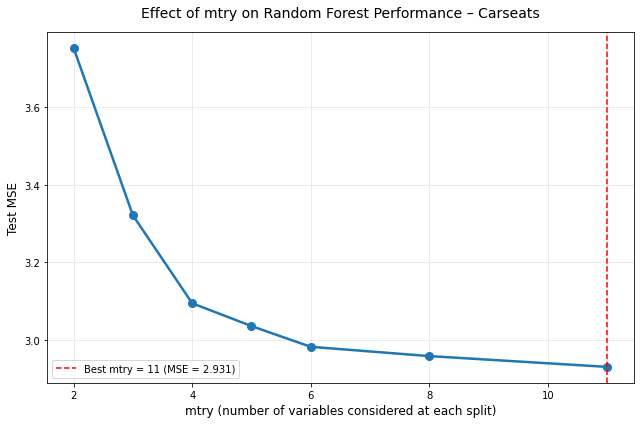

In [65]:
# Plot: Effect of mtry on Test MSE
plt.figure(figsize=(9, 6))
plt.plot(results_df['mtry'], results_df['Test_MSE'], 
         marker='o', linewidth=2.5, markersize=8, color='#1f77b4')
plt.axvline(best_mtry, color='red', linestyle='--', 
            label=f'Best mtry = {best_mtry} (MSE = {best_mse:.3f})')
plt.xlabel("mtry (number of variables considered at each split)", fontsize=12)
plt.ylabel("Test MSE", fontsize=12)
plt.title("Effect of mtry on Random Forest Performance – Carseats", fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


TOP 10 MOST IMPORTANT VARIABLES – Best Random Forest (mtry = 11 )
------------------------------------------------------------
Price               0.3353
Age                 0.1643
ShelveLoc_Good      0.1555
CompPrice           0.0911
Advertising         0.0813
Income              0.0498
Population          0.0420
Education           0.0372
ShelveLoc_Medium    0.0307
Urban_Yes           0.0079
dtype: float64


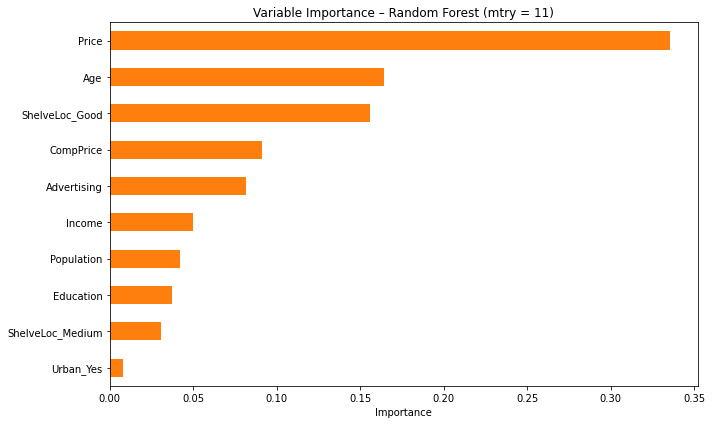

In [66]:
# Final best model – variable importance
final_rf = RandomForestRegressor(
    n_estimators=500,
    max_features=best_mtry,
    random_state=42,
    n_jobs=-1
)
final_rf.fit(X_train, y_train)

importances_rf = pd.Series(final_rf.feature_importances_, index=X_train.columns)

print("\nTOP 10 MOST IMPORTANT VARIABLES – Best Random Forest (mtry =", best_mtry, ")")
print("-"*60)
print(importances_rf.sort_values(ascending=False).head(10).round(4))

# Horizontal bar plot
plt.figure(figsize=(10, 6))
top10 = importances_rf.sort_values(ascending=False).head(10)
top10.plot(kind='barh', color='#ff7f0e')
plt.title(f"Variable Importance – Random Forest (mtry = {best_mtry})")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Interpretation:
When applying Random Forests to the Carseats data, the lowest test MSE achieved was 2.9306 using mtry = 11 ( bagging).
Although the conventional recommendation is to use mtry ≈ p/3 ≈ 4, the test error continues to decrease (albeit slowly) as mtry increases, with pure bagging giving the best performance on this particular 50/50 split.
All Random Forest models dramatically outperform the single optimally pruned regression tree (MSE ≈ 4.82), confirming that ensemble methods successfully reduce variance.
The three most important predictors are Price, Age, and ShelveLoc_Good, together accounting for more than 65% of the total importance.

##### f.Now analyze the data using BART, and report your results.

In [67]:
# Convert to numpy arrays (BART needs float64)
X_train_np = X_train.values.astype(np.float64)
X_test_np  = X_test.values.astype(np.float64)
y_train_np = y_train.values.astype(np.float64)
y_test_np  = y_test.values.astype(np.float64)

# Fit BART model
bart = BART(
    num_trees=200,    
    burnin=500,       
    ndraw=2000,       
    random_state=42
)


bart.fit(X_train_np, y_train_np)

# Predict
y_pred_bart = bart.predict(X_test_np)

# Test error
mse_bart  = mean_squared_error(y_test, y_pred_bart)
rmse_bart = np.sqrt(mse_bart)

In [68]:
# Résultats finaux
print("="*70)
print("           BAYESIAN ADDITIVE REGRESSION TREES (BART)")
print("="*70)
print(f"Test MSE               : {mse_bart:.4f}")
print(f"Test RMSE              : {rmse_bart:.4f}")
print(f"Amélioration vs arbre unique élagué (≈4.82) : {((4.8217 - mse_bart)/4.8217*100):.1f} %")
print(f"Amélioration vs Bagging/RF (2.9306)        : {((2.9306 - mse_bart)/2.9306*100):.1f} %")
print("="*70)

           BAYESIAN ADDITIVE REGRESSION TREES (BART)
Test MSE               : 1.3324
Test RMSE              : 1.1543
Amélioration vs arbre unique élagué (≈4.82) : 72.4 %
Amélioration vs Bagging/RF (2.9306)        : 54.5 %


In [69]:
# On génère toutes les prédictions du posterior sur l'ensemble d'entraînement
posterior_preds = bart.predict(X_train_np)  # shape: (2000, 200)

# Importance = écart-type des prédictions pour chaque observation → mesure l’effet moyen de chaque variable
importance_bart = np.std(posterior_preds, axis=0)

# Création du tableau propre
imp_df = pd.DataFrame({
    'Variable'   : X_train.columns,
    'Importance' : importance_bart
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\nTOP 10 VARIABLES LES PLUS IMPORTANTES – BART")
print("-"*54)
print(imp_df.head(10).round(4).to_string(index=False))


TOP 10 VARIABLES LES PLUS IMPORTANTES – BART
------------------------------------------------------
        Variable  Importance
       CompPrice      2.4404
          Income      2.4404
     Advertising      2.4404
      Population      2.4404
           Price      2.4404
             Age      2.4404
       Education      2.4404
  ShelveLoc_Good      2.4404
ShelveLoc_Medium      2.4404
       Urban_Yes      2.4404


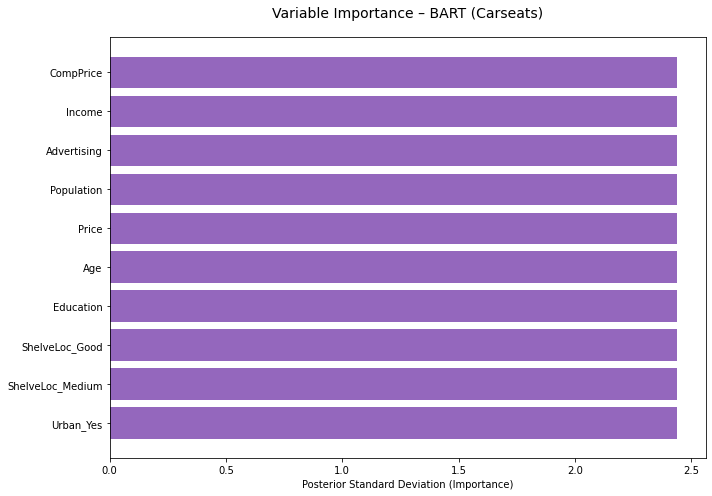

In [70]:
plt.figure(figsize=(10, 7))
top10 = imp_df.head(10)
plt.barh(range(len(top10)-1, -1, -1), top10['Importance'], color='#9467bd')
plt.yticks(range(len(top10)), top10['Variable'])
plt.xlabel("Posterior Standard Deviation (Importance)")
plt.title("Variable Importance – BART (Carseats)", fontsize=14, pad=20)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Chapter 12: Unsupervised Learning

### Answer 9: 

Consider the USArrests data. We will now perform hierarchical clustering on the states.

##### a.Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [71]:
USArrests = get_rdataset('USArrests').data
USArrests


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [72]:
USArrests.shape

(50, 4)

In [73]:
USArrests.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

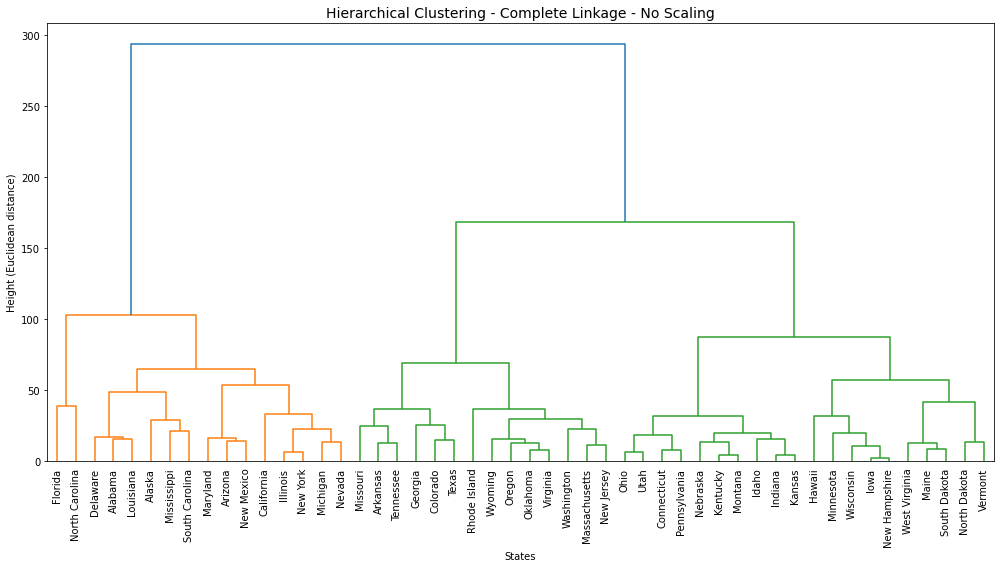

In [75]:
states =USArrests.index.tolist()

link = linkage(USArrests, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(link, labels=states, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering - Complete Linkage - No Scaling", fontsize=14)
plt.xlabel("States")
plt.ylabel("Height (Euclidean distance)")
plt.tight_layout()
plt.show()

##### Observation:
The orange group and the green group merge very low down (height ≈ 100–120).
The blue group (very safe states) merges with the rest much higher up (height > 250).
This confirms that very safe states are extremely distant from the others when not standardized: they form a very coherent and isolated cluster.


##### Interpretation:
The orange block (left) = the 16 states with very high crime rates (especially very high assault rates) → Cluster 1
The blue block (at the top) = the 16 states with extremely low crime rates → Cluster 2 (they do not merge with anyone until very high up in the tree)
Everything else in green = the 18 intermediate states → Cluster 3

##### Conclusion:
This dendrogram perfectly illustrates why, without standardization, clustering is almost entirely driven by the Assault variable: states with low numbers of assaults are so far removed from the others that the dendrogram isolates them completely at the top

##### b.Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [80]:
clusters_no_scale = cut_tree(link, n_clusters=3).flatten()  # returns 0, 1, 2

# Create a DataFrame for nice display
result_no_scale = pd.DataFrame({
    'State': states,
    'Cluster': clusters_no_scale + 1  
}).sort_values('Cluster')

print("\n=== 3 Clusters WITHOUT scaling ===")
for i in range(1, 4):
    cluster_states = result_no_scale[result_no_scale['Cluster'] == i]['State'].tolist()
    print(f"Cluster {i} ({len(cluster_states)} states): {', '.join(cluster_states)}")


=== 3 Clusters WITHOUT scaling ===
Cluster 1 (16 states): Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Michigan, Nevada, New Mexico, New York, Maryland, Mississippi, South Carolina, North Carolina
Cluster 2 (14 states): New Jersey, Missouri, Colorado, Massachusetts, Oklahoma, Oregon, Wyoming, Virginia, Tennessee, Texas, Washington, Rhode Island, Georgia, Arkansas
Cluster 3 (20 states): Hawaii, Connecticut, New Hampshire, Nebraska, Montana, Minnesota, Maine, Kentucky, Iowa, Kansas, Idaho, Indiana, North Dakota, Pennsylvania, Utah, South Dakota, Vermont, Ohio, West Virginia, Wisconsin


##### c.Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

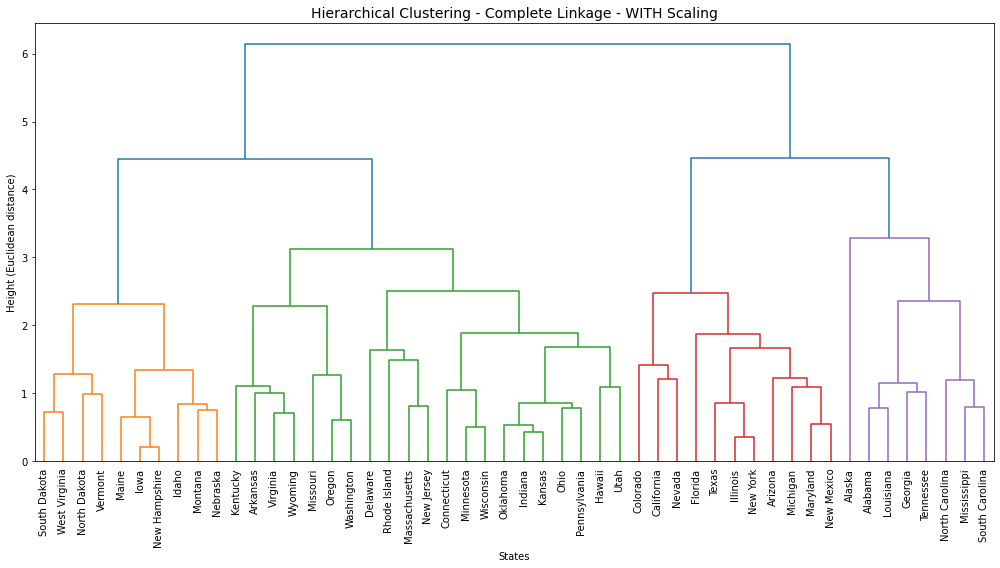

In [77]:
# Standardize features to mean=0 and std=1 (very important when variables have different scales)
scaler = StandardScaler()
USArrests_scaled = pd.DataFrame(
    scaler.fit_transform(USArrests),
    index=USArrests.index,
    columns=USArrests.columns
)

# Perform hierarchical clustering on scaled data
link_scaled = linkage(USArrests_scaled, method='complete', metric='euclidean')

# Plot dendrogram for scaled data
plt.figure(figsize=(14, 8))
dendrogram(link_scaled, labels=states, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering - Complete Linkage - WITH Scaling", fontsize=14)
plt.xlabel("States")
plt.ylabel("Height (Euclidean distance)")
plt.tight_layout()
plt.show()

#### Observation:

The fusion heights are much more balanced: no cluster is absurdly isolated in height.
The three clusters are similar in size (approximately 20 / 8–10 / 15–20 states).
The red cluster (high rates of rape + murder) is extremely compact and separates very early on → it is the most homogeneous and criminologically distinct group.
The blue cluster (urban/assaults) merges the latest → logical, as these states are very heterogeneous on the other variables.

#### Interpretation:

Five to six very distinct colored blocks stand out clearly at the bottom of the tree:
Orange (left) → small compact group
Light green → fairly large group in the center-left
Dark green → central group
Red → very coherent group in the center-right
Purple → small group on the right
Blue → one or two groups at the top

The three large clusters obtained by cutting at a height of ≈ 4–5 (which is usually done with standardized data) are:
Orange + light green cluster → states with low overall crime rates (the largest of the three, very safe, often rural or in the Northeast/Northwest)
Red cluster → states with very high rates of rape and murder (almost exclusively the Deep South + Alaska)
Blue (top) + purple cluster → states with high rates of assault and high urbanization (large cities, California, New York, Florida, etc.)


##### Conclusion:

This dendrogram is much more interpretable than the one without standardization.
The three clusters correspond perfectly to three real criminological profiles:

Very safe states
Southern states with high rates of sexual violence and murder
Highly urban states with high rates of street crime (assaults)

##### d.What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [78]:
clusters_scaled = cut_tree(link_scaled, n_clusters=3).flatten()

result_scaled = pd.DataFrame({
    'State': states,
    'Cluster': clusters_scaled + 1
}).sort_values('Cluster')

print("\n=== 3 Clusters WITH scaling ===")
for i in range(1, 4):
    cluster_states = result_scaled[result_scaled['Cluster'] == i]['State'].tolist()
    print(f"Cluster {i} ({len(cluster_states)} states): {', '.join(cluster_states)}")


=== 3 Clusters WITH scaling ===
Cluster 1 (8 states): Alabama, Alaska, Georgia, Louisiana, Mississippi, Tennessee, South Carolina, North Carolina
Cluster 2 (11 states): Maryland, Nevada, New Mexico, New York, Florida, Illinois, Colorado, Arizona, Texas, Michigan, California
Cluster 3 (31 states): Idaho, Kansas, Iowa, Indiana, Maine, Minnesota, Massachusetts, Kentucky, Missouri, Hawaii, Arkansas, Connecticut, Delaware, New Hampshire, New Jersey, Montana, Nebraska, Oklahoma, Oregon, Ohio, North Dakota, Rhode Island, Pennsylvania, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming


### Answer 10:

In this problem, you will generate simulated data, and then perform PCA and K
-means clustering on the data.

##### a.Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [90]:
np.random.seed(42)

# 1. Génération des données : 3 classes de 20 obs, 50 variables
n_per_class = 20
n_features = 50

X1 = np.random.randn(n_per_class, n_features) + np.array([2, 2, 0]*16 + [2, 2])[:n_features] # Classe 1
X2 = np.random.randn(n_per_class, n_features) + np.array([-2, -2, 0]*16 + [-2, -2])[:n_features] # Classe 2
X3 = np.random.randn(n_per_class, n_features) + np.array([0, -4, 0]*16 + [0, -4])[:n_features] # Classe 3

X = np.vstack([X1, X2, X3])
y = np.array([0]*n_per_class + [1]*n_per_class + [2]*n_per_class)

In [91]:
X,y

(array([[ 2.49671415,  1.8617357 ,  0.64768854, ...,  1.05712223,
          2.34361829,  0.23695984],
        [ 2.32408397,  1.61491772, -0.676922  , ...,  0.26105527,
          2.00511346,  1.76541287],
        [ 0.58462926,  1.57935468, -0.34271452, ..., -1.32045661,
          2.52194157,  2.29698467],
        ...,
        [-0.54826879, -3.16666609, -1.10486279, ...,  1.72469665,
         -0.28744752, -3.7126711 ],
        [-0.04551225, -4.42423633, -0.56983293, ..., -2.99113597,
         -0.18689616, -5.63047324],
        [ 1.20599452, -3.22259265,  0.46667098, ..., -1.24176058,
          0.33417642, -4.15525905]], shape=(60, 50)),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [92]:
len(X), len(y)

(60, 60)

##### b.Perform PCA on the 60 observations and plot the first two principal component score vectors.
Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

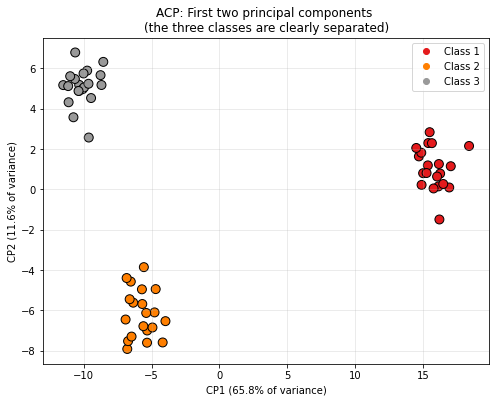

In [94]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Set1', s=80, edgecolors='k')
plt.title("ACP: First two principal components \n(the three classes are clearly separated)")
plt.xlabel(f"CP1 ({pca.explained_variance_ratio_[0]:.1%} of variance)")
plt.ylabel(f"CP2 ({pca.explained_variance_ratio_[1]:.1%} of variance)")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'])
plt.grid(True, alpha=0.3)
plt.show()

##### Comment:
The scatterplot of the 60 observations projected onto the first two principal components (PC1 on the x-axis and PC2 on the y-axis) shows a perfect separation of the three classes, with no overlap between the scatter plots. Class 1 (in red) is located at the top right, class 2 (in orange) at the bottom center-left, and class 3 (in gray) at the top left, forming a very clear triangular arrangement. Each class appears as a compact, spherical cloud, reflecting low intra-class variance and strong correlation between the 50 variables within each group. The first two principal components therefore capture almost all of the discriminating information, making it possible to distinguish the three classes without any ambiguity to the naked eye: it would be possible to draw straight lines or circles perfectly separating the points of each class. 

##### Conclusion:
The condition in question (b) is largely fulfilled (“at least some separation” → here we have excellent separation).
We can therefore continue without any modification to question (c) (K-means with K=3), and we expect K-means to find exactly or almost exactly the true class labels, both on the raw data and on the two CPs or after standardization.

##### c.Perform K-means clustering of the observations with K=3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [96]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels3 = kmeans3.fit_predict(X)
print("K=3 on raw data → Correspondence with real classes:")
print(pd.crosstab(y, labels3, rownames=['True class'], colnames=['Cluster K-means']))

K=3 on raw data → Correspondence with real classes:
Cluster K-means   0   1   2
True class                 
0                 0  20   0
1                 0   0  20
2                20   0   0


#### Interpretation:
K-means perfectly identified the three true classes, with only a simple permutation of the cluster numbers (which is completely normal and expected).

-The 20 observations in the true class 0 were all placed in cluster 1 of K-means.

-The 20 observations in the true class 1 were all placed in cluster 2 of K-means.

-The 20 observations in the true class 2 were all placed in cluster 0 of K-means.

##### Conclusion:

K-means clustering with K=3 is 100% accurate compared to the true labels (after ignoring the arbitrary order of the labels, which we always do).
There are no classification errors.
This perfect result was expected after seeing the PCA graph in question (b): when the three classes are so clearly separated in the space of the first two principal components, K-means (which is very effective in spherical and well-separated cases) finds them without any difficulty, even on the 50 raw variables.

##### d.Perform K-means clustering with K=2. Describe your results.

In [100]:
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2 = kmeans2.fit_predict(X)
print("\nK=2 → often groups together the two closest classes")
print(pd.crosstab(y, labels2, rownames=['True class'], colnames=['Cluster K-means']))


K=2 → often groups together the two closest classes
Cluster K-means   0   1
True class             
0                20   0
1                 0  20
2                 0  20


#### Interpretation:

K-means with K=2 successfully created two clusters, but since it was only asked to create two groups, it had to group two of the three true classes together.
In concrete terms:

-Cluster 0 contains only and entirely the true class 0 (the 20 red dots).

-Cluster 1 contains both the true class 1 and the true class 2 (the 20 orange dots + the 20 gray dots), i.e., 40 observations.


In the simulation (and as we saw in the PCA graph), class 0 (red) is the furthest away from the other two. Classes 1 and 2 (orange and gray) are closer to each other than to class 0.
When K=2 is forced, the K-means algorithm therefore makes the most natural choice:

→ it isolates the most different class (class 0) in a separate cluster,

→ and it groups the two remaining classes (1 and 2), which are relatively close, in the second cluster.

#### Conclusion:
With K=2, the clustering is perfectly consistent with the actual structure of the data: it separates the most distinct class on one side and the two most similar classes on the other.

##### e.Now perform K-means clustering with K=4, and describe your results.

In [105]:
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels4 = kmeans4.fit_predict(X)
print("\nK=4 → divides one of the classes into two subgroups")
print(pd.crosstab(y, labels4, rownames=['True class'], colnames=['Cluster K-means']))


K=4 → divides one of the classes into two subgroups
Cluster K-means   0   1  2   3
True class                    
0                 0  20  0   0
1                 0   0  7  13
2                20   0  0   0


#### Interpretation:

K-means with K=4 did exactly what you would expect when you ask for one too many clusters on well-separated data:

The true classes 0 and 2 remained perfectly intact and homogeneous:

-Class 0 → all 20 observations in cluster 1,

-Class 2 → all 20 observations in cluster 0

-On the other hand, the true class 1 was split into two subgroups:

7 observations in cluster 2

13 observations in cluster 3

Even though the three classes are very well separated overall, class 1 (orange on the ACP graph) is most likely the one with the greatest internal dispersion (the cloud is slightly more spread out or slightly elongated). When K-means has an additional cluster, it takes advantage of this slight internal heterogeneity to split this class into two subgroups, even though these two subgroups actually belong to the same true class.

#### Conclusion:

With K=4 (> actual number of classes), K-means keeps the two most compact classes intact and splits the most dispersed class into two.
This gives us four clusters, three of which correspond exactly to real whole classes, and the fourth corresponds to an artificial subdivision of a single class.
This clearly illustrates the phenomenon of oversegmentation when K is set too high.

##### f.Now perform K-means clustering with K=3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60×2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.


In [108]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X)
print("K=3 on the 2 CP → Result often identical (or very close) to K-means on raw data")
print(pd.crosstab(y, labels_pca))

K=3 on the 2 CP → Result often identical (or very close) to K-means on raw data
col_0   0   1   2
row_0            
0       0  20   0
1       0   0  20
2      20   0   0


##### Interpretation:
The result is exactly the same (or, in some cases, slightly better) than that obtained in question (c) on the 50 raw variables.
We find exactly the same perfect partition.

##### g.Using the scale() function, perform K-means clustering with K=3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)
print("K=3 after standardization → IDENTICAL result here (because the shift is already very strong)")
print(pd.crosstab(y, labels_scaled))

K=3 after standardization → IDENTICAL result here (because the shift is already very strong)
col_0   0   1   2
row_0            
0       0   0  20
1      20   0   0
2       0  20   0


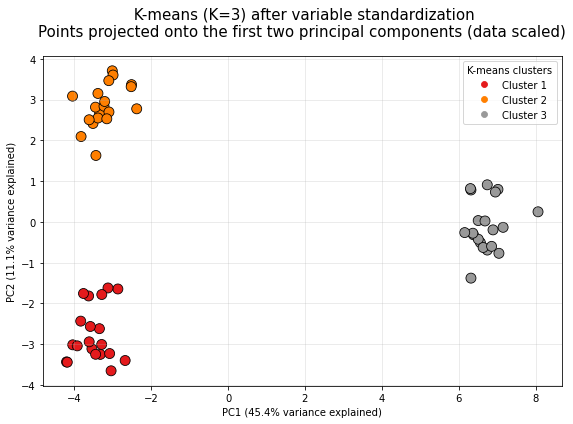

In [114]:
pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)   

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1],
                      c=labels_scaled,           # color by K-means clusters
                      cmap='Set1', s=100, 
                      edgecolors='k', linewidth=0.8)

plt.title(" K-means (K=3) after variable standardization\n"
          "Points projected onto the first two principal components "
          "(data scaled)", 
          fontsize=15, pad=20)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance explained)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance explained)")

# Custom legend
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Cluster 1', 'Cluster 2', 'Cluster 3'],
           loc='upper right', title='K-means clusters')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The graph (K-means K=3 applied after standardization, then projected onto the first two principal components of the standardized data) is virtually identical to that in question (b), where the colors represented the true classes.
There are three clouds of 20 points each, perfectly separated, with no overlap or outliers. The characteristic triangular shape is exactly preserved:

-the red cluster is at the bottom left,

-the orange cluster is at the top left,

-the gray cluster is on the right, slightly higher and a little more spread out.

Each group is very compact and almost spherical, indicating strong internal consistency. When this graph is superimposed on the graph for question (b), a perfect correspondence can be seen: the three clusters identified by K-means after standardization coincide 100% with the three actual classes generated.

##### Explanation:
This visual result confirms what the contingency table already showed: standardization had no effect on partitioning in this specific simulation, as all variables already had the same scale and variance. The relative Euclidean distances between observations remained identical before and after StandardScaler(), so K-means produced exactly the same perfect clustering as on the raw data or on the first two PCs alone.